## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random


1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.



In [2]:
N = random.randint(10000, 1310719)
data = pd.read_csv('data_000637.txt', sep=",", nrows=N)
print("Number of rows: ", N)
data.head()

Number of rows:  252729


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25


2\. Find out the number of BX in a ORBIT (the value 'x').



In [3]:
x = data["BX_COUNTER"].max()+1
print("The number of BX in a ORBIT : ",x)

The number of BX in a ORBIT :  3564


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.



In [4]:
time = (data["ORBIT_CNT"].max()-data["ORBIT_CNT"].min())*x*25
print("The experiment lasted: ", time, "ns =", time*10**(-9),"s")

The experiment lasted:  223997400 ns = 0.2239974 s


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [5]:
time = (data["ORBIT_CNT"]*x+data["BX_COUNTER"])*25
data['ABS_TIME'] = time
data.head()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,1,0,123,3869200167,2374,26,344745734939050
1,1,0,124,3869200167,2374,27,344745734939050
2,1,0,63,3869200167,2553,28,344745734943525
3,1,0,64,3869200167,2558,19,344745734943650
4,1,0,64,3869200167,2760,25,344745734948700


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [6]:
data["HEAD"] = np.random.randint(2, size=len(data))
data.head()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME
0,1,0,123,3869200167,2374,26,344745734939050
1,1,0,124,3869200167,2374,27,344745734939050
2,0,0,63,3869200167,2553,28,344745734943525
3,0,0,64,3869200167,2558,19,344745734943650
4,1,0,64,3869200167,2760,25,344745734948700


6\. Create a new DataFrame that contains only the rows with HEAD=1.


In [7]:
d_1 = data[data["HEAD"]==1]

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel


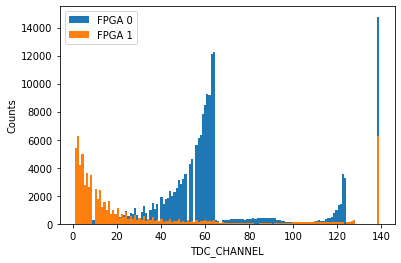

In [8]:
fpga_0 = data[data['FPGA'] == 0]['TDC_CHANNEL']
fpga_1 = data[data['FPGA'] == 1]['TDC_CHANNEL']
plt.hist(fpga_0, bins=fpga_0.max(), label="FPGA 0")
plt.hist(fpga_1, bins=fpga_1.max(), label="FPGA 1")
plt.legend()
plt.xlabel("TDC_CHANNEL")
plt.ylabel("Counts")
plt.show()

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)


In [9]:
tdc_ = data.groupby('TDC_CHANNEL').size().sort_values(ascending=False)
noisy_ch = tdc_[0:3:]
print('The 3 most noisy TDC channels are:','\n',noisy_ch)

The 3 most noisy TDC channels are: 
 TDC_CHANNEL
139    21028
64     12587
63     12331
dtype: int64


9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [10]:
n_unique = len(data.ORBIT_CNT.unique())
print("Numbers of unique orbits : " , n_unique)
print("Number of unique orbits with at least one measurement from TDC_CHANNEL=139 : ", len(data[data['TDC_CHANNEL']==139].ORBIT_CNT.unique()))

Numbers of unique orbits :  2512
Number of unique orbits with at least one measurement from TDC_CHANNEL=139 :  2508
